In [1]:
import os
import csv
import codecs
import numpy

In [2]:
def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [3]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [4]:
def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index)
    deleteList1 = sorted(deleteList, reverse=True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows
            

In [5]:
def outlierMarker(tlogRows):
    nOutlier = 0
    nTotal = 0
    for index in range(len(tlogRows)):
        nTotal = nTotal + 1
        if tlogRows[index][3]=='-120':
            tlogRows[index].append('0')
            tlogRows[index].append('0')
            continue
        if float(tlogRows[index][3])-float(tlogRows[index-1][3])>925:
            #if time dur between two taps is big outlier(exceed)
            tlogRows[index].append('0')
            tlogRows[index].append('0')
            nOutlier = nOutlier + 1
        else:
            tlogRows[index].append('1')
            tlogRows[index].append(str(float(tlogRows[index][3])-float(tlogRows[index-1][3])))
    #print([nTotal,nOutlier])
    
    return tlogRows

In [6]:
# totally 38717 rows in the tlog, 2249 outliers(using the upper bound for all blocks:925ms)

In [7]:
outlierMarker(deleteTheRows(addEventKey(readAlltlogs())))

[['502', '1', '1487340082506', '-120', 'ä', '1', '112', 'ä', '0', '0'],
 ['502', '2', '1487340082932', '306', 'ää', '1', '112', 'ä', '1', '426.0'],
 ['502', '3', '1487340083507', '881', 'ään', '1', '112', 'n', '1', '575.0'],
 ['502', '4', '1487340084083', '1457', 'äänr', '1', '112', 'r', '1', '576.0'],
 ['502', '5', '1487340084462', '1836', 'äänrs', '1', '112', 's', '1', '379.0'],
 ['502',
  '6',
  '1487340084925',
  '2299',
  'äänrst',
  '1',
  '112',
  't',
  '1',
  '463.0'],
 ['502',
  '7',
  '1487340085512',
  '2886',
  'äänrstä',
  '1',
  '112',
  'ä',
  '1',
  '587.0'],
 ['502',
  '8',
  '1487340085967',
  '3341',
  'äänrstän',
  '1',
  '112',
  'n',
  '1',
  '455.0'],
 ['502',
  '9',
  '1487340086309',
  '3683',
  'äänrstän ',
  '1',
  '112',
  ' ',
  '1',
  '342.0'],
 ['502',
  '10',
  '1487340086723',
  '4097',
  'äänrstän j',
  '1',
  '112',
  'j',
  '1',
  '414.0'],
 ['502',
  '11',
  '1487340087191',
  '4565',
  'äänrstän jä',
  '1',
  '112',
  'ä',
  '1',
  '468.0'],
 ['50

In [8]:
# current tlog structure
#[subject,action,systime,trialtime,textarea,block,sentance,isUsefulData?(outliers:0),timeDurFromLastTap]

In [11]:
#read fixations for one subject

def readFixationsForOneSubject(subject):
    path = ".\\PJ0009\\data\\fixations_"
    files= os.listdir(path) #得到文件夹下的所有文件名称
    fixations = []
    for file in files:
        if not os.path.isdir(file) and str(file).split('_')[1]==subject:
            f = codecs.open(path+"/"+file, 'r', encoding = 'utf8')
            reader = csv.reader(f)
            flag = 0
            for line in reader:
                flag = flag + 1
                if flag ==1:
                    continue
                if flag > 1:
                    fixations.append(line)
            f.close()
    return fixations

In [12]:
def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
        return False

In [13]:
def x_cm2pic(x):
    xscale =1838-594 ; x0 = 94; xim = 500
    return x*xscale+x0+xim
    
def y_cm2pic(y):
    yscale =2524-1920 ; y0 = 1720; yim = 200
    return y*yscale+y0+yim

def xy_cm2pic(x,y):
    return [x_cm2pic(x),y_cm2pic(y)]

# return key position
def KeyToXY(key):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    xs = [566, 697, 828, 959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 566, 697, 828, 
          959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 740, 900, 1060, 1220, 1380, 1540, 
          1700, 1872, 1220]
    ys = [2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2248, 2248, 2248, 
          2248, 2248, 2248, 2248, 2248, 2248, 2248, 2248, 2452, 2452, 2452, 2452, 2452, 2452, 
          2452, 2455, 2656]
    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]

In [14]:
def setupTs(ts,timeDurBetween2Taps):
    if ts>timeDurBetween2Taps:
        return timeDurBetween2Taps
    else:
        return ts
    

In [15]:
def dis(key, fixPosX, fixPoxY):
    import math
    
    xk = KeyToXY(key)[0]
    yk = KeyToXY(key)[1]
    xf = x_cm2pic(fixPosX)
    yf = y_cm2pic(fixPoxY)
    return math.sqrt((xf-xk)*(xf-xk)+(yf-yk)*(yf-yk))
    

In [16]:
def calculateForAll(ts, te):
    
    #ts, te are in ms
    
    import matplotlib.pyplot as plt
    import operator as op

    alltlogs = outlierMarker(deleteTheRows(addEventKey(readAlltlogs())))

    flag = 0
    currentFix = -1
    fixationForOneSubject = []
    allSubjects = []
    keyList = []
    fixationList = []
    fixlog = []

    #read all subject numbers
    for line in alltlogs:
        if line[0] not in allSubjects:
            allSubjects.append(line[0])

    for item in allSubjects:
        #calculate for each subject
        fixationForOneSubject = readFixationsForOneSubject(str(item))
        
        for line in alltlogs:
            
            if line[0]==item and not len(KeyToXY(line[7]))==0:
                #find all tlogs for current subject
                #eventKey is in key list
                if line[8]=='0':
                    #if it is the first line in each file(time=-120) or it is an outlier
                    #trialtimeBefore = float(line[3])
                    #lastKey = line[7]
                    continue
                else:
                    trialtime = float(line[3])
                    eventKey = line[7]
                    dtemp = 100000
                    fixX = -1
                    fixY = -1
                    for line1 in fixationForOneSubject:
                        #current sentence, between 2 taps, how many fixations
                        #print(line1[3])
                        #######problems:
                        #1. in some fixation files, trial time was written as system time(much bigger than normal)
                        #2. in some fixation files, trial time was written as a string with characters
                        if not line1[4] == currentFix:
                            #take the first line in all same fixation lines
                            if line1[1]== line[5]:
                                #same block
                                if isNumber(line1[3]):
                                    # don't count lines with character trial time
                                    if line1[2].split('.')[0] == line[6].split('.')[0] and trialtime-setupTs(ts, float(line[9]))<float(line1[3])<trialtime-te:
                                        #same sentence, time between trialtime-ts and trialtime-te (ts>te)                                        
                                        dcurrent = dis(eventKey, float(line1[5]), float(line1[6]))
                                        if dcurrent<dtemp:
                                            xFix = x_cm2pic(float(line1[5]))
                                            yFix = y_cm2pic(float(line1[6]))
                                            dtemp = dcurrent
                    fixlog.append([eventKey,xFix,yFix])
        
    for item in fixlog:
        if item[0] not in keyList:
            keyList.append(item[0])
    
    dictD = {}
    for key1 in keyList:
        dictD[key1]=[]
    for item in fixlog:
        dictD[item[0]].append([item[1],item[2]])
    return [dictD,keyList]

    

In [17]:
def returnXYForKey(dictD,key):
    tempList = dictD[key]
    xList = []
    yList = []
    for index in range(len(tempList)):
        xList.append(tempList[index][0])
        yList.append(tempList[index][1])
    return [xList,yList]

In [18]:
def drawHeatMaps(x,y,title):
    from matplotlib import pyplot as plt
    plt.hist2d(x, y, bins=10)
    plt.grid(True)
    plt.colorbar()
    plt.xlim((-1, 2))
    plt.ylim((-2, 3))
    plt.show()

In [19]:
def drawFix(x, y, key):
 
    from PIL import Image, ImageDraw, ImageFont
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    image = Image.open('back.png')
    draw = ImageDraw.Draw(image)
       
    for index in range(len(x)):
        draw.ellipse((x[index], y[index], x[index]+10, y[index]+10), fill = (255, 0, 0))
        
    font1 = ImageFont.truetype("arial.ttf", 80)
    #draw.text((keyToXY(key)[0],keyToXY(key)[1]), key,  fill=(255, 255, 255), font=font1)
    
    image.save(key+ ".png")
    #image.show()

In [20]:
#1. GitHub下载pyHeatMap：使用Python绘制热图的库，并放在D盘根目录下
#2. 在anaconda控制台中，将当前目录调整为pyHeatMap文件所在的目录下
#3. pip inatall pyheatmap
#4. 回到jupyter nootbook运行程序

import os
import sys

module_path = os.sep.join(os.path.abspath("C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python36\\Lib").split(os.sep)[:-2])
sys.path.append(module_path)
sys.path.append(os.path.join(module_path, "pyheatmap"))

from pyheatmap.heatmap import HeatMap


def load_data_from_file(fn):
    lines = open(fn).read().split("\n")
    data = []
    for ln in lines:
        a = ln.split(",")
        if len(a) != 2:
            continue
        a = [int(i) for i in a]
        data.append(a)

    return data

def drawHeatmap(data,title):
    
    hm = HeatMap(data)
    #hm.clickmap(save_as="hit.png")
    # hm.heatmap(save_as="heat.png", r=20) # 这儿可以传入 r 参数，指定热图半径，默认 r=10
    hm.heatmap(save_as=title+".png", r=30, base="back.png")
    #hm.heatmap(save_as="heat.png")



In [21]:
result = calculateForAll(925, 0)
d = result[0]
keyList = result[1]
for item in keyList:
    temp = returnXYForKey(d,item)
    
    x = temp[0]
    y = temp[1]
    xy = []
    
    for index in range(len(x)):
        xy.append([int(x[index]),int(y[index])])
    
    drawHeatmap(xy, item)

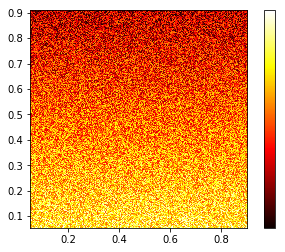

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np
x, y = np.random.rand(10), np.random.rand(10)
z = (np.random.rand(9000000)+np.linspace(0,1, 9000000)).reshape(3000, 3000)
plt.imshow(z+10, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)),
        cmap=cm.hot, norm=LogNorm())
plt.colorbar()
plt.show()

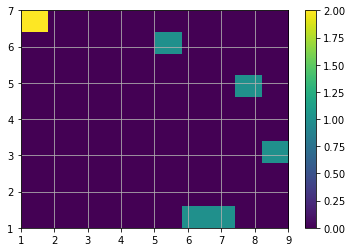

In [35]:
from matplotlib import pyplot as plt
 
x = [1,5,6,9,8,7,1]
y = [7,6,1,3,5,1,7]
plt.hist2d(x, y, bins=10)
plt.grid(True)
plt.colorbar()
plt.show()